In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
segmentation = pd.read_excel('technology_sale.xls')
segmentation = segmentation.replace(0, np.nan)
segmentation = segmentation.replace(0.0, np.nan)

segmentation

,Country Name,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.414376,NaN,NaN,NaN,3.213858,3.292313,4.052655,10.240098
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.164748,13.560725,...,20.476748,26.697423,26.401619,16.330524,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.179503,...,0.959975,0.991777,4.222700,6.167415,1.314305,3.469616,0.764653,0.893509,0.530149,0.443274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.521451,0.259033,0.239195,0.509999,0.382329,0.275285,0.374468,0.357467,0.316456,0.215666
254,South Africa,NaN,NaN,NaN,NaN,6.968005,4.727846,4.876683,5.710910,5.650818,...,4.829067,5.537992,6.656222,6.458640,5.580763,5.123385,5.354949,4.281209,5.111740,5.527700
255,"Congo, Dem. Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,NaN,NaN,NaN,NaN,NaN,2.480392,NaN,2.162541,2.045811,...,0.505137,0.756467,1.090506,1.868518,2.945876,2.543997,1.499434,0.955027,24.800570,NaN


In [3]:
# calulate growth 
growth = list()
growth_defferent_year = list()
average_growth_rate = list()
for i in range(0, segmentation.shape[0]):
    
    earlier_sale = 0
    latest_sale = 0
    
    earlier_year = 0
    latest_year = 0
    
    # calculate start date
    for start_year in range(1988, 2012):
        year = str(start_year)
        if not math.isnan(segmentation.loc[i, year]):
            earlier_sale = segmentation.loc[i, year]
            earlier_year = start_year
            break
    # calculate latest data
    for finish_data in range(2012, 1989, -1):
        year = str(finish_data)
        if not math.isnan(segmentation.loc[i, year]):
            latest_sale = segmentation.loc[i, year]
            latest_year = finish_data
            break
            
    if not math.isnan(earlier_sale) and  earlier_sale != 0:
        growth.append((latest_sale - earlier_sale) / earlier_sale)
        growth_defferent_year.append(latest_year - earlier_year)
        average_growth_rate.append(growth[i] / growth_defferent_year[i])
    else:
        growth.append(np.nan)
        growth_defferent_year.append(np.nan)
        average_growth_rate.append(np.nan)

segmentation['growth rate'] = growth
segmentation['growth rate per year'] = average_growth_rate

segmentation = segmentation.sort_values(by=['growth rate per year'])
segmentation = segmentation.dropna(subset=['growth rate per year'])

segmentation.index = pd.RangeIndex(start=0, stop=segmentation.shape[0], step=1)

# Because countris (Belize,Turkmenistan) are very different against other countries we delete them
segmentation = segmentation.loc[:200, :]

segmentation

c:\users\amir khan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


,Country Name,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,growth rate,growth rate per year
0,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.980364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.461447,-0.153816
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.780368,NaN,0.056513,NaN,NaN,NaN,NaN,NaN,-0.928656,-0.116082
2,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.076493,0.134238,0.115641,NaN,NaN,NaN,NaN,NaN,-0.712990,-0.101856
3,"Bahamas, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000416,0.389316,0.000132,NaN,0.000033,0.001796,NaN,NaN,-0.999933,-0.083328
4,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.144933,5.486603,0.751318,0.125440,0.215993,0.137311,0.000088,NaN,-0.999807,-0.076908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.363192,6.217878,8.949339,4.789840,6.212478,8.612004,14.491016,NaN,105.740196,7.552871
197,Kiribati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.847974,11.664286,33.847189,42.720707,NaN,38.493175,44.394280,8.878856
198,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,0.038303,0.025336,0.426413,...,13.698733,6.219043,8.698276,5.458336,13.919719,12.141384,6.503795,NaN,168.797688,9.929276
199,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.106306,0.038765,0.086765,6.531830,60.443575,20.147858


In [4]:
filter_data = segmentation.dropna(subset=['growth rate'])
filter_data = segmentation.dropna(subset=['growth rate per year'])



print(filter_data)

            Country Name  1988  1989  1990  1991  1992  1993      1994  \
0                 Tuvalu   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
1    Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
2              Swaziland   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
3           Bahamas, The   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
4                 Bhutan   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
..                   ...   ...   ...   ...   ...   ...   ...       ...   
196              Vietnam   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
197             Kiribati   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
198             Suriname   NaN   NaN   NaN   NaN   NaN   NaN  0.038303   
199                Tonga   NaN   NaN   NaN   NaN   NaN   NaN       NaN   
200      Solomon Islands   NaN   NaN   NaN   NaN   NaN   NaN       NaN   

         1995      1996  ...       2005      2006      2007       2008  \
0         NaN       NaN  ...  14.9803

In [5]:
clustering_filter_data = filter_data.filter(items=['growth rate per year'])

model_fit = KMeans(n_clusters=4).fit(clustering_filter_data)
cluster_list = model_fit.predict(clustering_filter_data)
filter_data 

,Country Name,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2005,2006,2007,2008,2009,2010,2011,2012,growth rate,growth rate per year
0,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.980364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.461447,-0.153816
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.780368,NaN,0.056513,NaN,NaN,NaN,NaN,NaN,-0.928656,-0.116082
2,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.076493,0.134238,0.115641,NaN,NaN,NaN,NaN,NaN,-0.712990,-0.101856
3,"Bahamas, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000416,0.389316,0.000132,NaN,0.000033,0.001796,NaN,NaN,-0.999933,-0.083328
4,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.144933,5.486603,0.751318,0.125440,0.215993,0.137311,0.000088,NaN,-0.999807,-0.076908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.363192,6.217878,8.949339,4.789840,6.212478,8.612004,14.491016,NaN,105.740196,7.552871
197,Kiribati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.847974,11.664286,33.847189,42.720707,NaN,38.493175,44.394280,8.878856
198,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,0.038303,0.025336,0.426413,...,13.698733,6.219043,8.698276,5.458336,13.919719,12.141384,6.503795,NaN,168.797688,9.929276
199,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.106306,0.038765,0.086765,6.531830,60.443575,20.147858


In [6]:
filter_data['cluster code'] = cluster_list
filter_data

,Country Name,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,growth rate,growth rate per year,cluster code
0,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.461447,-0.153816,0
1,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.056513,NaN,NaN,NaN,NaN,NaN,-0.928656,-0.116082,0
2,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.134238,0.115641,NaN,NaN,NaN,NaN,NaN,-0.712990,-0.101856,0
3,"Bahamas, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.389316,0.000132,NaN,0.000033,0.001796,NaN,NaN,-0.999933,-0.083328,0
4,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.486603,0.751318,0.125440,0.215993,0.137311,0.000088,NaN,-0.999807,-0.076908,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.217878,8.949339,4.789840,6.212478,8.612004,14.491016,NaN,105.740196,7.552871,1
197,Kiribati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.847974,11.664286,33.847189,42.720707,NaN,38.493175,44.394280,8.878856,1
198,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,0.038303,0.025336,0.426413,...,6.219043,8.698276,5.458336,13.919719,12.141384,6.503795,NaN,168.797688,9.929276,1
199,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.106306,0.038765,0.086765,6.531830,60.443575,20.147858,2


In [7]:
empty_list = list()
for i  in range(0, filter_data.shape[0]):
    empty_list.append(0)


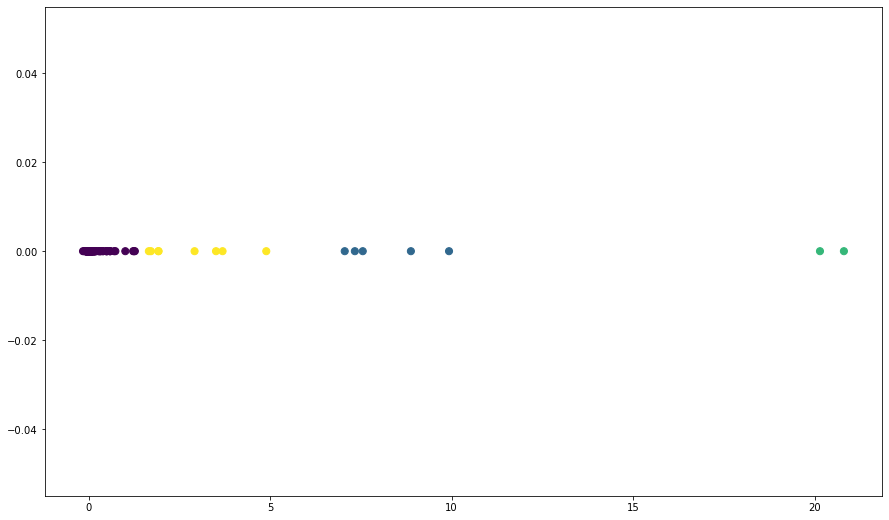

In [8]:
plt.figure(figsize=(15,9))
plt.scatter(filter_data.loc[:, 'growth rate per year'], empty_list,c=cluster_list, s=50, cmap='viridis')